In [74]:
import os
import pandas as pd
from path import Path
%matplotlib inline
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [75]:
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [76]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [77]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [78]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    )
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 4103


In [113]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    )
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 1102


In [119]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        big_string = article['title'] +""+ article['content']
        sentiment = analyzer.polarity_scores(big_string)
      
        bitcoin_sentiments.append({
            "text": article["content"],
            "date": article["publishedAt"][:10],
            "compound": sentiment["compound"],
            "positive": sentiment["pos"],
            "negative": sentiment["neg"],
            "neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create Bitcoin DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral","positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

    

,compound,negative,neutral,positive,text
0,-0.6486,0.125,0.835,0.040,"Since its inception in 2009, Bitcoin has made ..."
1,-0.8720,0.171,0.829,0.000,New allegations against a bitcoin developer sp...
2,0.5719,0.061,0.819,0.120,Federal authorities in the U.S. have unsealed ...
3,0.5070,0.000,0.943,0.057,Our robot colleague Satoshi Nakaboto writes ab...
4,-0.0418,0.071,0.864,0.065,The Fine Print: The following comments are own...


In [120]:
ethereum_headlines

{'status': 'ok',
 'totalResults': 1102,
 'articles': [{'source': {'id': 'the-next-web', 'name': 'The Next Web'},
   'author': 'David Canellis',
   'title': 'IKEA just allowed an invoice to be paid via the Ethereum blockchain',
   'description': 'IKEA Iceland has used Ethereum technology to settle an invoice with a local retailer, accepting payment in blockchainified digital cash. Supply chain payments firm Tradeshift facilitated the transfer using an Ethereum-based version of the Icelandic króna crea…',
   'url': 'https://thenextweb.com/hardfork/2019/10/02/ikea-iceland-smart-contracts-ethereum-tradeshift-monerium-invoice-nordic-store/',
   'urlToImage': 'https://img-cdn.tnwcdn.com/image/hardfork?filter_last=1&fit=1280%2C640&url=https%3A%2F%2Fcdn0.tnwcdn.com%2Fwp-content%2Fblogs.dir%2F1%2Ffiles%2F2019%2F10%2Fikea.jpg&signature=a0e7268a6116bde5ff687adb1195cf03',
   'publishedAt': '2019-10-02T13:33:44Z',
   'content': 'IKEA Iceland has used Ethereum ETHtechnology to settle an invoice with

In [123]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        big_string = article['content']# + article['title']
        sentiment = analyzer.polarity_scores(big_string)
      
        ethereum_sentiments.append({
            "text": article["content"],
            "date": article["publishedAt"][:10],
            "compound": sentiment["compound"],
            "positive": sentiment["pos"],
            "negative": sentiment["neg"],
            "neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create Ethereum DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral","positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,compound,negative,neutral,positive,text
0,0.3818,0.000,0.933,0.067,IKEA Iceland has used Ethereum ETHtechnology t...
1,0.1901,0.000,0.956,0.044,Blockchains like Ethereums are often pitched a...
2,0.4019,0.000,0.932,0.068,TLDR: The Complete Blockchain and Ethereum Pro...
3,0.1027,0.054,0.882,0.063,"Further to its previous blockchain exploits, t..."
4,0.2500,0.033,0.911,0.056,"Australias Perth Mint, one of the worlds large..."


In [126]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.362420,0.029750,0.901200,0.069050
std,0.432882,0.047695,0.044169,0.029031
min,-0.872000,0.000000,0.819000,0.000000
25%,0.423375,0.000000,0.878250,0.056500
50%,0.507000,0.000000,0.905500,0.057500
75%,0.590450,0.047500,0.943000,0.085750
max,0.706900,0.171000,0.945000,0.128000


In [127]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.078374,0.045947,0.889263,0.064737
std,0.380920,0.055848,0.076653,0.044782
min,-0.823200,0.000000,0.735000,0.000000
25%,-0.038600,0.000000,0.842500,0.036500
50%,0.102700,0.033000,0.911000,0.059000
75%,0.318000,0.073000,0.937000,0.098500
max,0.731100,0.210000,1.000000,0.139000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [128]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [129]:
# Expand the default stop words list if necessa
sw_added= [',',""]

In [130]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text= word_tokenize(text)
    # Convert the words to lowercase
    text= [word.lower() for word in text]
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    # Remove the stop words
    sw = set(stopwords.words('english')+ sw_added)
    # Lemmatize Words into root words
    lemmatizer= WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text= [word for word in text if word not in sw]
    
    
    return text


In [131]:
# Complete the tokenizer function
#def tokenizer(text):
    #"""Tokenizes text."""
    #sw = set(stopwords.words('english'))
    #regex = re.compile("[^a-zA-Z ]")
    #re_clean = regex.sub('', text)
    #words = word_tokenize(re_clean)
    #output= [word.lower() for word in words if word.lower() not in sw]
    #lemmatizer= WordNetLemmatizer()
    #tokens = [lemmatizer.lemmatize(word) for word in output]
    
    #return tokens


In [132]:
# Create a new tokens column for bitcoin
tokens=[]
tokens= [tokenizer(text) for text in bitcoin_df["text"]]
bitcoin_df["tokens"]= tokens
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.6486,0.125,0.835,0.040,"Since its inception in 2009, Bitcoin has made ...","[since, inception, bitcoin, ha, made, ruined, ..."
1,-0.8720,0.171,0.829,0.000,New allegations against a bitcoin developer sp...,"[new, allegation, bitcoin, developer, spurred,..."
2,0.5719,0.061,0.819,0.120,Federal authorities in the U.S. have unsealed ...,"[federal, authority, u, unsealed, charge, sout..."
3,0.5070,0.000,0.943,0.057,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,-0.0418,0.071,0.864,0.065,The Fine Print: The following comments are own...,"[fine, print, following, comment, owned, whoev..."


In [111]:
ethereum_df

,compound,negative,neutral,positive,text
0,-0.4939,0.066,0.934,0.0,IKEA Iceland has used Ethereum ETHtechnology t...
1,-0.4939,0.066,0.934,0.0,Blockchains like Ethereums are often pitched a...
2,-0.4939,0.066,0.934,0.0,TLDR: The Complete Blockchain and Ethereum Pro...
3,-0.4939,0.066,0.934,0.0,"Further to its previous blockchain exploits, t..."
4,-0.4939,0.066,0.934,0.0,"Australias Perth Mint, one of the worlds large..."
5,-0.4939,0.066,0.934,0.0,Announced at Ethereum Foundation's Devcon 5 co...
6,-0.4939,0.066,0.934,0.0,The total transactional volume of blockchain a...
7,-0.4939,0.066,0.934,0.0,"MakerDAO, the decentralized organization that ..."
8,-0.4939,0.066,0.934,0.0,"Good morning Forkers, you know what time it is..."
9,-0.4939,0.066,0.934,0.0,The central bank of Venezuela is reportedly lo...


In [144]:
# Create a new tokens column for ethereum
tokens_eth=[]
#[tokens_eth.append(tokenizer(tokens)) for text in ethereum_df.text]
tokens_eth= [tokenizer(text) for text in ethereum_df["text"]]
ethereum_df["tokens"]= tokens_eth
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.3818,0.000,0.933,0.067,IKEA Iceland has used Ethereum ETHtechnology t...,"[ikea, iceland, ha, used, ethereum, ethtechnol..."
1,0.1901,0.000,0.956,0.044,Blockchains like Ethereums are often pitched a...,"[blockchains, like, ethereums, often, pitched,..."
2,0.4019,0.000,0.932,0.068,TLDR: The Complete Blockchain and Ethereum Pro...,"[tldr, complete, blockchain, ethereum, program..."
3,0.1027,0.054,0.882,0.063,"Further to its previous blockchain exploits, t...","[previous, blockchain, exploit, united, nation..."
4,0.2500,0.033,0.911,0.056,"Australias Perth Mint, one of the worlds large...","[australia, perth, mint, one, world, largest, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [134]:
from collections import Counter
from nltk import ngrams

In [135]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in bitcoin_df.tokens]
dict(bigram_counts[0].most_common(20))


{('since', 'inception'): 1,
 ('inception', 'bitcoin'): 1,
 ('bitcoin', 'ha'): 1,
 ('ha', 'made'): 1,
 ('made', 'ruined'): 1,
 ('ruined', 'fortune'): 1,
 ('fortune', 'helped'): 1,
 ('helped', 'sell'): 1,
 ('sell', 'fentanyl'): 1,
 ('fentanyl', 'book'): 1,
 ('book', 'cryptocurrency'): 1,
 ('cryptocurrency', 'withstood'): 1,
 ('withstood', 'literally'): 1,
 ('literally', 'million'): 1,
 ('million', 'joke'): 1,
 ('joke', 'many'): 1,
 ('many', 'prediction'): 1,
 ('prediction', 'imminent'): 1,
 ('imminent', 'collapse'): 1,
 ('collapse', 'andthrough'): 1}

In [137]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in ethereum_df.tokens]
dict(eth_bigram_counts[0].most_common(20))

{('ikea', 'iceland'): 1,
 ('iceland', 'ha'): 1,
 ('ha', 'used'): 1,
 ('used', 'ethereum'): 1,
 ('ethereum', 'ethtechnology'): 1,
 ('ethtechnology', 'settle'): 1,
 ('settle', 'invoice'): 1,
 ('invoice', 'local'): 1,
 ('local', 'retailer'): 1,
 ('retailer', 'accepting'): 1,
 ('accepting', 'payment'): 1,
 ('payment', 'blockchainified'): 1,
 ('blockchainified', 'digital'): 1,
 ('digital', 'cash'): 1,
 ('cash', 'supply'): 1,
 ('supply', 'chain'): 1,
 ('chain', 'payment'): 1,
 ('payment', 'firm'): 1,
 ('firm', 'tradeshift'): 1,
 ('tradeshift', 'facilitated'): 1}

In [140]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [141]:
# Get the top 10 words for Bitcoin
top10_btc= []
for tokens in bitcoin_df.tokens:
    top10_btc += tokens
btc_token_count=token_count(top10_btc)
btc_token_count

[('bitcoin', 52),
 ('satoshi', 33),
 ('nakaboto', 32),
 ('char', 19),
 ('welcome', 17),
 ('robot', 16),
 ('colleague', 16),
 ('writes', 16),
 ('btc', 16),
 ('every', 16)]

In [145]:
# Get the top 10 words for Ethereum
top10_eth= []
for tokens in ethereum_df.tokens:
    top10_eth += tokens
eth_token_count=token_count(top10_eth)
eth_token_count

[('char', 19),
 ('ethereum', 6),
 ('cryptocurrency', 6),
 ('blockchain', 5),
 ('bitcoin', 5),
 ('auction', 5),
 ('ha', 4),
 ('security', 4),
 ('payment', 3),
 ('cryptocurrencies', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [153]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

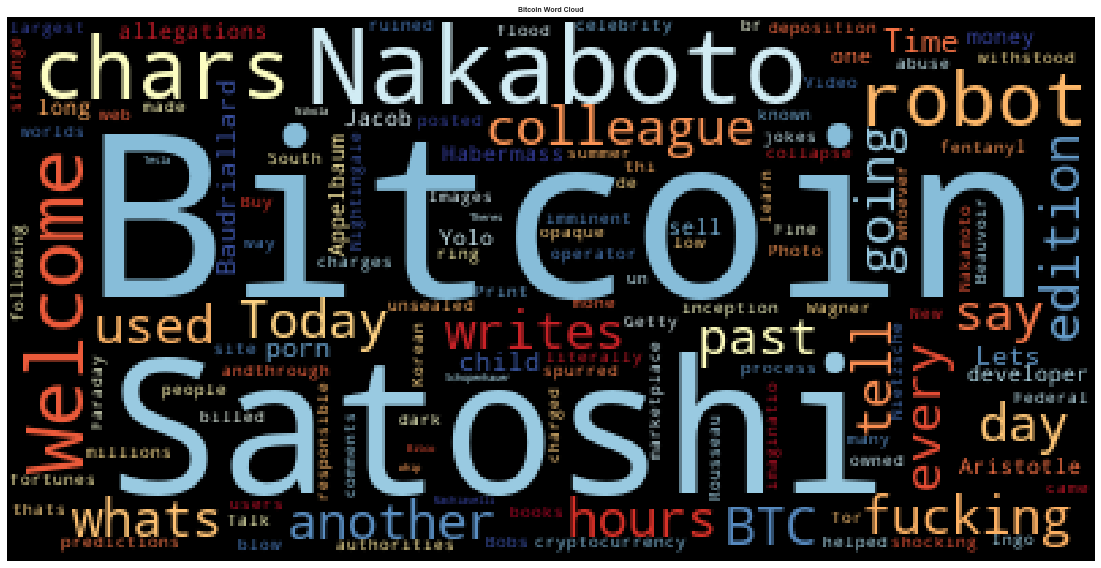

In [169]:
# Generate the Bitcoin word cloud
# Create a string list of terms to generate the word cloud
terms_list = ''
for token in bitcoin_df.text:
    terms_list += token

# Create the word cloud
wordcloud = WordCloud(collocations= False, colormap="RdYlBu_r").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 7, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

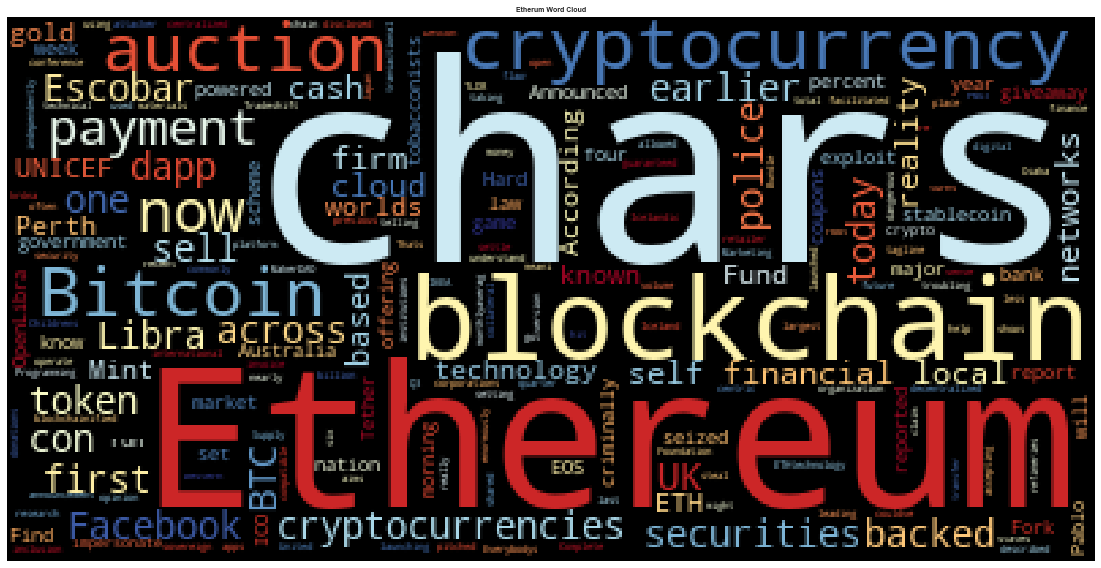

In [170]:
# Generate the Ethereum word cloud
terms_list_eth = ''
for token in ethereum_df.text:
    terms_list_eth += token

# Create the word cloud
wordcloud = WordCloud(collocations= False, colormap="RdYlBu_r").generate(terms_list_eth)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 7, "fontweight": "bold"}
plt.title("Etherum Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [171]:
import spacy
from spacy import displacy

In [172]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [173]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [174]:
# Concatenate all of the bitcoin text together
terms_list

'Since its inception in 2009, Bitcoin has made and ruined fortunes, helped sell fentanyl and books about cryptocurrency, withstood literally millions of jokes and just as many predictions of imminent collapse, andthrough a process opaque to most people, myself… [+10529 chars]New allegations against a bitcoin developer spurred a deposition from Jacob Appelbaum\r\nPhoto by Ingo Wagner / Getty Images\r\nIn the summer of 2016, a flood of abuse allegations came out against celebrity Tor developer Jacob Appelbaum, a shocking blow to one of… [+6852 chars]Federal authorities in the U.S. have unsealed charges against the South Korean operator of a child porn ring thats been billed as the worlds largest dark web child porn marketplace. The child porn site, known as Welcome to Video, charged some users in Bitcoin… [+2092 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats b

In [175]:
# Run the NER processor on all of the text
ner_btc= nlp(terms_list)

# Add a title to the document
ner_btc.user_data["title"]= "Bitcoin NER"

In [178]:
# Render the visualization
displacy.render(ner_btc, style= "ent")

In [ ]:
# List all Entities

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together

In [ ]:
# Run the NER processor on all of the text

# Add a title to the document

In [ ]:
# Render the visualization

In [ ]:
# List all Entities